# MTA Exploratory Data Analysis

In this project we will try to find the most and least crowded stations to make better descision to make the riders experiance easy and help the shops owners to increase their sales

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import FormatStrFormatter

%matplotlib inline

### Get the data and visualise first 10 rows

In [2]:
# Source: http://web.mta.info/developers/turnstile.html
def get_data_parse_dt(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url, parse_dates=[['DATE','TIME']], keep_date_col=True))
    return pd.concat(dfs)
        
week_nums = [210612, 210619, 210626, 210703, 210710, 210717, 210724, 210731, 210807, 210814, 210821, 210828] #
df = get_data_parse_dt(week_nums)

In [3]:
df.head(10)

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,2021-06-05 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/05/2021,00:00:00,REGULAR,7581941,2591624
1,2021-06-05 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/05/2021,04:00:00,REGULAR,7581950,2591625
2,2021-06-05 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/05/2021,08:00:00,REGULAR,7581954,2591635
3,2021-06-05 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/05/2021,12:00:00,REGULAR,7582009,2591655
4,2021-06-05 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/05/2021,16:00:00,REGULAR,7582124,2591683
5,2021-06-05 20:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/05/2021,20:00:00,REGULAR,7582248,2591700
6,2021-06-06 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/06/2021,00:00:00,REGULAR,7582304,2591711
7,2021-06-06 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/06/2021,04:00:00,REGULAR,7582310,2591712
8,2021-06-06 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/06/2021,08:00:00,REGULAR,7582321,2591725
9,2021-06-06 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/06/2021,12:00:00,REGULAR,7582348,2591751


### Remove any spaces in the columns names 

In [4]:
df.columns = [column.strip() for column in df.columns]
df.columns

Index(['DATE_TIME', 'C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION',
       'DATE', 'TIME', 'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

### Check if there is duplicated rows

In [5]:
duplicate = (df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME", "DESC"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False))


count = duplicate[duplicate["ENTRIES"] > 1].ENTRIES.count()
print(f"We have {count} duplicated rows")
duplicate[duplicate["ENTRIES"] > 1].head()

We have 0 duplicated rows


,C/A,UNIT,SCP,STATION,DATE_TIME,DESC,ENTRIES


### Take all rows with Regular Desc

In [6]:
mask = df["DESC"] == "REGULAR"
df = df[mask]

df.head()

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,2021-06-05 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/05/2021,00:00:00,REGULAR,7581941,2591624
1,2021-06-05 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/05/2021,04:00:00,REGULAR,7581950,2591625
2,2021-06-05 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/05/2021,08:00:00,REGULAR,7581954,2591635
3,2021-06-05 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/05/2021,12:00:00,REGULAR,7582009,2591655
4,2021-06-05 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/05/2021,16:00:00,REGULAR,7582124,2591683


### Make sure that there is no more duplicated rows

In [7]:
(df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2021-06-05 00:00:00,1
1667716,R138,R293,00-03-01,34 ST-PENN STA,2021-06-13 14:00:00,1
1667709,R138,R293,00-03-01,34 ST-PENN STA,2021-06-12 10:00:00,1
1667710,R138,R293,00-03-01,34 ST-PENN STA,2021-06-12 14:00:00,1
1667711,R138,R293,00-03-01,34 ST-PENN STA,2021-06-12 18:00:00,1


### Find the hourly ENTRIES & EXITS for each station
> 1- Calculate total entries and exits for each station and time <br>
> 2- Create new columns which are the PREV_ENTRIES & PREV_EXITS <br>
> 3- Find hourly entries and exits by subtracting Current - Prev <br>

### Calculate total entries and exits for each station and time

In [8]:
df_station_hourly = (df.groupby(["STATION", "DATE_TIME"],as_index=False).ENTRIES.sum())
df_station_hourly["EXITS"] = df.groupby(["STATION", "DATE_TIME"],as_index=False).EXITS.sum()["EXITS"]
df_station_hourly.head(10)

,STATION,DATE_TIME,ENTRIES,EXITS
0,1 AV,2021-06-05 00:00:00,463469358,467561277
1,1 AV,2021-06-05 04:00:00,459281262,448879330
2,1 AV,2021-06-05 08:00:00,463470068,467562591
3,1 AV,2021-06-05 12:00:00,463471095,467564448
4,1 AV,2021-06-05 16:00:00,463472982,467567736
5,1 AV,2021-06-05 20:00:00,463474970,467571266
6,1 AV,2021-06-06 00:00:00,463476406,467573798
7,1 AV,2021-06-06 04:00:00,463476853,467574643
8,1 AV,2021-06-06 08:00:00,463477020,467575101
9,1 AV,2021-06-06 12:00:00,463477883,467576595


### Create new columns which are the PREV_ENTRIES & PREV_EXITS

In [9]:
df_station_hourly['PREV_ENTRIES'] = df_station_hourly['ENTRIES'].shift(1)
df_station_hourly['PREV_EXITS'] = df_station_hourly['EXITS'].shift(1)

In [10]:
df_station_hourly.head()

,STATION,DATE_TIME,ENTRIES,EXITS,PREV_ENTRIES,PREV_EXITS
0,1 AV,2021-06-05 00:00:00,463469358,467561277,NaN,NaN
1,1 AV,2021-06-05 04:00:00,459281262,448879330,463469358.0,467561277.0
2,1 AV,2021-06-05 08:00:00,463470068,467562591,459281262.0,448879330.0
3,1 AV,2021-06-05 12:00:00,463471095,467564448,463470068.0,467562591.0
4,1 AV,2021-06-05 16:00:00,463472982,467567736,463471095.0,467564448.0


1- Find hourly entries by subtracting ENTRIES - PREV_ENTRIES <br>
2- Find hourly exits by subtracting EXITS - PREV_EXITS <br>
3- Find hourly entries and exits by subtracting ENTRIES - PREV_ENTRIES <br>

In [11]:
def get_hourly_counts(row, max_counter, name):
    counter = row[name] - row["PREV_"+name]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        counter = min(row[name], row["PREV_"+name])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

df_station_hourly["HOURLY_ENTRIES"] = df_station_hourly.apply(get_hourly_counts, axis=1, max_counter=5000000, name="ENTRIES")
df_station_hourly["HOURLY_EXITS"] = df_station_hourly.apply(get_hourly_counts, axis=1, max_counter=5000000, name="EXITS")

In [12]:
df_station_hourly.head(5)

,STATION,DATE_TIME,ENTRIES,EXITS,PREV_ENTRIES,PREV_EXITS,HOURLY_ENTRIES,HOURLY_EXITS
0,1 AV,2021-06-05 00:00:00,463469358,467561277,NaN,NaN,NaN,NaN
1,1 AV,2021-06-05 04:00:00,459281262,448879330,463469358.0,467561277.0,4188096.0,0.0
2,1 AV,2021-06-05 08:00:00,463470068,467562591,459281262.0,448879330.0,4188806.0,0.0
3,1 AV,2021-06-05 12:00:00,463471095,467564448,463470068.0,467562591.0,1027.0,1857.0
4,1 AV,2021-06-05 16:00:00,463472982,467567736,463471095.0,467564448.0,1887.0,3288.0


### Drop all rows that has NaN value

In [13]:
df_station_hourly.dropna(subset=["PREV_ENTRIES","PREV_EXITS","HOURLY_ENTRIES", "HOURLY_EXITS"], axis=0, inplace = True)

In [14]:
df_station_hourly.head()

,STATION,DATE_TIME,ENTRIES,EXITS,PREV_ENTRIES,PREV_EXITS,HOURLY_ENTRIES,HOURLY_EXITS
1,1 AV,2021-06-05 04:00:00,459281262,448879330,463469358.0,467561277.0,4188096.0,0.0
2,1 AV,2021-06-05 08:00:00,463470068,467562591,459281262.0,448879330.0,4188806.0,0.0
3,1 AV,2021-06-05 12:00:00,463471095,467564448,463470068.0,467562591.0,1027.0,1857.0
4,1 AV,2021-06-05 16:00:00,463472982,467567736,463471095.0,467564448.0,1887.0,3288.0
5,1 AV,2021-06-05 20:00:00,463474970,467571266,463472982.0,467567736.0,1988.0,3530.0


### FIND total trafic
> TOTAL_TRAFIC = HOURLY_EXITS + HOURLY_ENTRIES

In [15]:
df_station_hourly["TOTAL_TRAFIC"] = (df_station_hourly["HOURLY_EXITS"] + df_station_hourly["HOURLY_ENTRIES"])

df_station_hourly.head()

,STATION,DATE_TIME,ENTRIES,EXITS,PREV_ENTRIES,PREV_EXITS,HOURLY_ENTRIES,HOURLY_EXITS,TOTAL_TRAFIC
1,1 AV,2021-06-05 04:00:00,459281262,448879330,463469358.0,467561277.0,4188096.0,0.0,4188096.0
2,1 AV,2021-06-05 08:00:00,463470068,467562591,459281262.0,448879330.0,4188806.0,0.0,4188806.0
3,1 AV,2021-06-05 12:00:00,463471095,467564448,463470068.0,467562591.0,1027.0,1857.0,2884.0
4,1 AV,2021-06-05 16:00:00,463472982,467567736,463471095.0,467564448.0,1887.0,3288.0,5175.0
5,1 AV,2021-06-05 20:00:00,463474970,467571266,463472982.0,467567736.0,1988.0,3530.0,5518.0


### Get top five stations

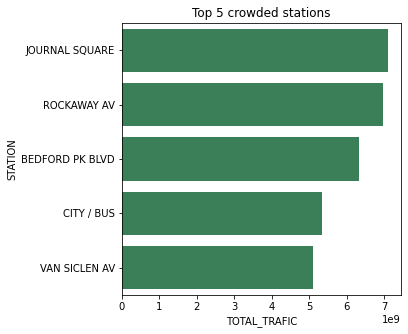

In [16]:
top_five = df_station_hourly.groupby('STATION')['TOTAL_TRAFIC'].sum().reset_index().sort_values(['TOTAL_TRAFIC'],ascending=False).head(5)

plt.figure(figsize = [5,5]);
axx = sns.barplot(data=top_five,x='TOTAL_TRAFIC',y='STATION', ci=None, color="#2e8b57");
plt.title('Top 5 crowded stations');
plt.xticks(rotation = 0);

### Get bottom five stations

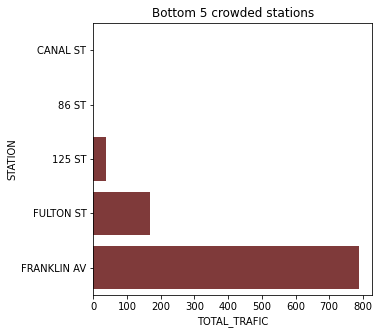

In [17]:
bottom_five = df_station_hourly.groupby('STATION')['TOTAL_TRAFIC'].sum().reset_index().sort_values(['TOTAL_TRAFIC'],ascending=True).head(5)

plt.figure(figsize = [5,5]);
axx = sns.barplot(data=bottom_five,x='TOTAL_TRAFIC',y='STATION', ci=None, color="#8b2e2e");
plt.title('Bottom 5 crowded stations');
plt.xticks(rotation = 0);

Before we move on, We can see that the first two stations has 0 traffic which is wired! <br>
In the next step we will exclude any row that has HOURLY_ENTRIES HOURLY_EXITS < 0

In [18]:
mask = ((df_station_hourly["TOTAL_TRAFIC"] > 0))

fixed_df = df_station_hourly[mask]

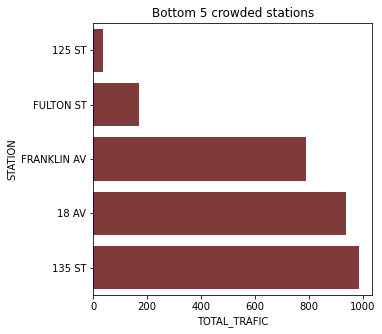

In [19]:
bottom_five = fixed_df.groupby('STATION')['TOTAL_TRAFIC'].sum().reset_index().sort_values(['TOTAL_TRAFIC'],ascending=True).head(5)

plt.figure(figsize = [5,5]);
axx = sns.barplot(data=bottom_five,x='TOTAL_TRAFIC',y='STATION', ci=None, color="#8b2e2e");
plt.title('Bottom 5 crowded stations');
plt.xticks(rotation = 0);

### To create box plot we need to take a subset of Top/Bottom five stations from the original dataframe<br>
> 1- Create a TF column to mark top five stations with the value True <br> 
> 2- Create a BF column to mark bottom five stations with the value True

In [20]:
fixed_df["TF"] = fixed_df.STATION.isin(top_five.STATION)

<ipython-input-20-759388d0663d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed_df["TF"] = fixed_df.STATION.isin(top_five.STATION)


In [21]:
sns.set(rc={'figure.figsize':(10,10)})

## Box plot for Top five stations:

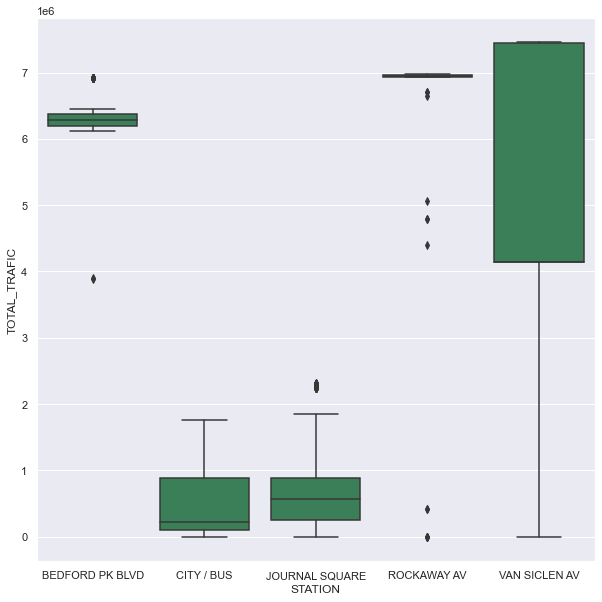

In [22]:
ax = sns.boxplot(x="STATION", y="TOTAL_TRAFIC", data=fixed_df[fixed_df["TF"] == True], color="seagreen")

In [23]:
fixed_df["BF"] = fixed_df.STATION.isin(bottom_five.STATION)

<ipython-input-23-8c98bd2b3cac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed_df["BF"] = fixed_df.STATION.isin(bottom_five.STATION)


## Box plot for Bottom five stations:

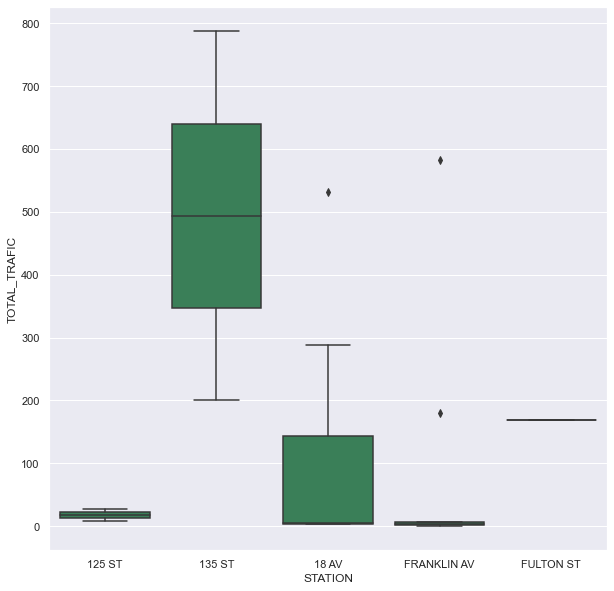

In [24]:
ax = sns.boxplot(x="STATION", y="TOTAL_TRAFIC", data=fixed_df[fixed_df["BF"] == True], color="seagreen")